# Atlas notebooks

## Computing and visualizing regional climate change (temperature vs precipitation) for reference regions

*24/6/2021*

**M. Iturbide** (Santander Meteorology Group. Institute of Physics of Cantabria, CSIC-UC, Santander, Spain).

> This notebook reproduces and extends parts of the regional figures of the AR6-WGI Atlas chapter, in particular the scatter plots of regional climate change temperature vs precipitation for the AR6 reference regions using CMIP5 and CMIP6 datasets (_Figures Atlas.13, 16 ,17, 21, 22, 24 ,26 and 29_). 

> This and other notebooks are available at https://github.com/IPCC-WG1/Atlas for reproducibility and reusability purpose. This notebook builds on other sections of the repository: 1) auxiliary scripts from [reproducibility](https://github.com/IPCC-WG1/Atlas/tree/master/reproducibility), and 2) CMIP5/6 - CORDEX [aggregated datasets](https://github.com/IPCC-WG1/Atlas/tree/master/datasets-aggregated-regionally) for the WGI reference regions.

### 1. Easy and direct production of the figures

#### Load packages
This notebook is based on R programming language and requires packages `magrittr` and `httr`

In [1]:
## The package magrittr is used to pipe (%>%) sequences of data operations improving readability
#install.packages("magrittr")
library(magrittr)
## The package httr is used to work with URLs and HTTP
#install.packages("httr")
library(httr)

## Libraries lattice and latticeExtra are used internally to produce the figures
#install.packages("lattice")
#install.packages("latticeExtra")
library(lattice)
library(latticeExtra)
## To produce the final pannel of the plots library gridExtra is used.
#install.packages("gridExtra")
library(gridExtra)

The main function to generate the boxplots and scatterplots is `computeFigures`, which internally uses functions `computeDeltas` and `computeOffset`, all available in this repository. To **load the functions in the working environment** use the `source` R base function as follows.

In [2]:
# Function computeDeltas available at this repo is used:
source("https://raw.githubusercontent.com/IPCC-WG1/Atlas/devel/datasets-aggregated-regionally/scripts/computeDeltas.R")
source("https://raw.githubusercontent.com/IPCC-WG1/Atlas/devel/datasets-aggregated-regionally/scripts/computeFigures.R")
source("https://raw.githubusercontent.com/IPCC-WG1/Atlas/devel/datasets-aggregated-regionally/scripts/computeOffset.R")

**Set the parameters** of function `computeFigures` by creating the R objects of the following cell.

In [3]:
# select seasons (define a list of vector/s) to show in the Precipitation vs Temperature scatterplots (use c(12,1,2) for winter). 
scatter.seasons <- list(c(12, 1, 2), 6:8)

# select baseline period (e.g. AR6 reference period in this example). Available years in the datasets are 1850-1900 and 1950-2100
ref.period <- 1995:2014

# select the surface, i.e. "land", "sea" or "landsea"
area <- "land"

# Select reference regions (see reference-regions in this repository). Use regions <- "world" to generate global results.
regions <- c("ECA", "EAS"); 

# Select a CORDEX domain from the following options: 
# SAM, CAM, NAM, AFR, WAS, EAS, AUS, ANT, ARC, SEA and EUR
cordex.domain <- "EAS"

# Finally, select figure axes ranges (ylim for temperature, xlim for precipitation percentage). 
# Leave it as NULL for automatic axes ranges
ylim <- NULL
xlim <- NULL

**Apply** `computeFigures`. 

In [4]:
fig <- computeFigures(regions = regions,
                      cordex.domain = cordex.domain,
                      area = area, 
                      ref.period = ref.period, 
                      scatter.seasons = scatter.seasons,
                      xlim = xlim,
                      ylim = ylim)

[2021-06-25 14:10:39] Computing annual delta changes for the Boxplot of region ECA

[2021-06-25 14:10:39] Computing CMIP5..

[2021-06-25 14:10:43] Computing CMIP6..

[2021-06-25 14:10:47] Computing CORDEX..

[2021-06-25 14:14:20] Computing seasonal delta changes for the Scatterplots of region ECA

[2021-06-25 14:14:20] Computing CMIP5..

[2021-06-25 14:14:33] Computing CMIP6..

[2021-06-25 14:14:46] Computing CORDEX..

[2021-06-25 14:16:56] Computing annual delta changes for the Boxplot of region EAS

[2021-06-25 14:16:56] Computing CMIP5..

[2021-06-25 14:17:00] Computing CMIP6..

[2021-06-25 14:17:04] Computing CORDEX..

[2021-06-25 14:20:40] Computing seasonal delta changes for the Scatterplots of region EAS

[2021-06-25 14:20:40] Computing CMIP5..

[2021-06-25 14:20:50] Computing CMIP6..

[2021-06-25 14:21:01] Computing CORDEX..



In [11]:
class(fig)
class(fig[[1]]) # check the class of the first slot in the list

[1] "list"

[1] "trellis"

The output is a `list` of `trellis` class objects that can be easily **arranged and displayed** using function `grid.arrange` from the library `gridExtra` (loaded at the beginning of the notebook)

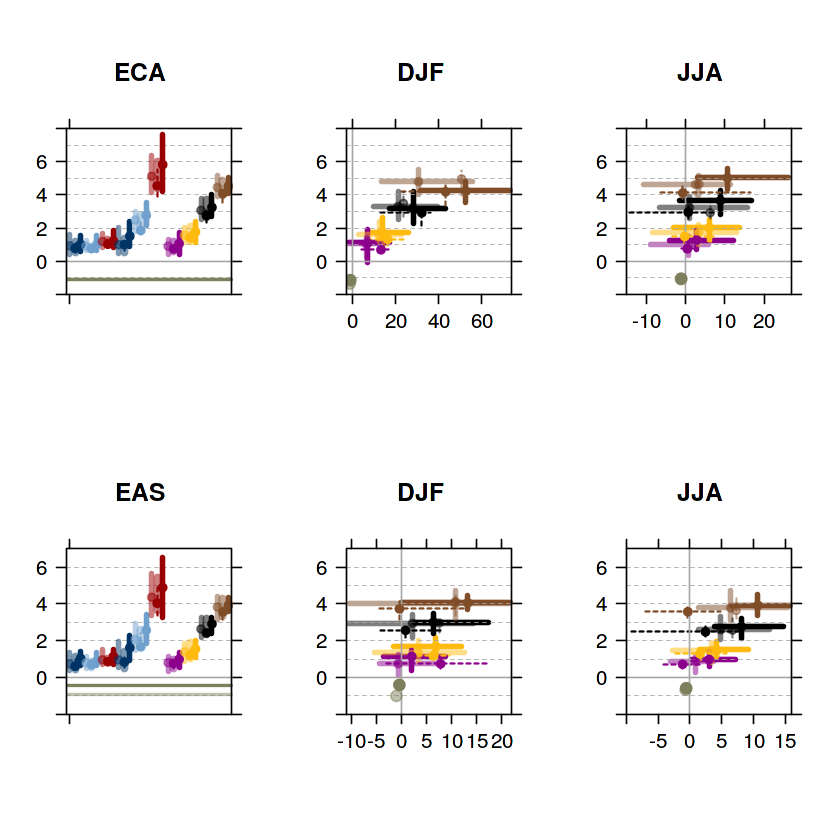

In [5]:
do.call("grid.arrange", fig)

**The legend and axis label information of this pannels is the one shown in the  AR6-WGI Atlas chapter figures**. The first column shows the annual temperature delta changes, and the second and the third, the scatterplots of the seasonal temperature and precipitation changes. Each row corresponds to a different reference region (ECA and EAS in this worked example).

**Export the Figure** using `pdf`. There are other export options such as `png` (type `?pdf` for help) or such as the functions from the `Cairo` package (`install.packages("Cairo")`), for instance `CairoPDF`. 

In [ ]:
# select the path and the name of the output pdf 
# (here we build the name with function `paste0` from the parametter setting) used)
outfilename <- paste0(cordex.domain, "_", area, "_baseperiod_", paste(range(ref.period), collapse = "-"), "_ATvsAP.pdf")

# Play with arguments width and height to create different size pds-s
pdf(outfilename, width = (length(scatter.seasons)+1)*10/2*0.85, height = length(regions)*10/2*0.85)
do.call("grid.arrange", fig)
dev.off()

Set the object `cordex.domain` as `FALSE` to **exclude CORDEX from the final figure**. For example for computing **global delta changes**. 

In [13]:
regions <- c("world")
cordex.domain <- FALSE

fig.w <- computeFigures(regions = regions,
                      cordex.domain = cordex.domain,
                      area = area, 
                      ref.period = ref.period, 
                      scatter.seasons = scatter.seasons,
                      xlim = xlim,
                      ylim = ylim)

[2021-06-25 14:32:15] Computing annual delta changes for the Boxplot of region world

[2021-06-25 14:32:15] Computing CMIP5..

[2021-06-25 14:32:18] Computing CMIP6..

[2021-06-25 14:32:22] Computing CORDEX..

[2021-06-25 14:35:56] Computing seasonal delta changes for the Scatterplots of region world

[2021-06-25 14:35:56] Computing CMIP5..

[2021-06-25 14:36:06] Computing CMIP6..

[2021-06-25 14:36:18] Computing CORDEX..



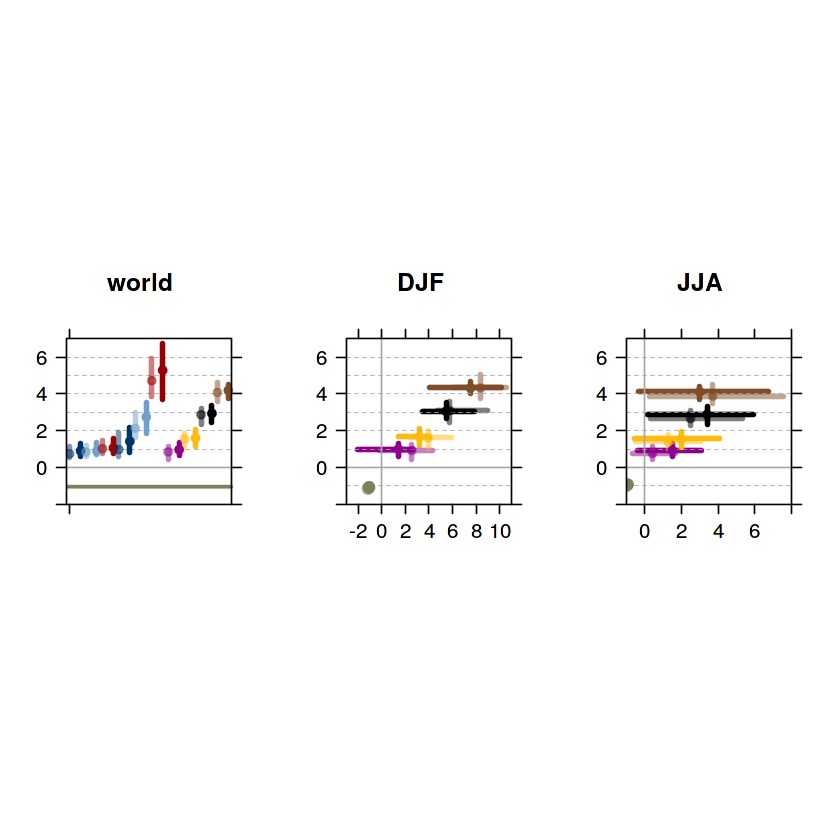

In [14]:
do.call("grid.arrange", fig.w)

As you have been able to see, it is very easy to reproduce parts of the AR6-WGI Atlas chapter figures with function `computeFigures`. **To extend the results shown in the chapter just use different parameter settings**, e.g. additional seasons, alternative baselines, etc ... 

Furthermore, functions `computeDeltas` and `computeOffset` (wich are internally applied by `computeFigures`) can also be applied directly to obtain the data behind the boxplots/scatterplots allowing for further plotting options that the user might consider (see next section for a worked example).

### 2. Obtention of data matrixes of the delta changes

In this example we will compute CMIP5 annual temperature changes for different Global Warming Levels. Therefore the following parameters are set.

In [72]:
project <- "CMIP5" # other options are CMIP6 and CORDEX
experiment <- "rcp85" 
var <- "tas"
season <- 1:12
ref.period <- 1986:2005
periods <- c("1.5", "2", "3", "4") 
area <- "land"
region <- c("NSA", "SES")
cordex.domain <- "SAM" # THIS PARAMETER WILL BE IGNORED IN THE CASES DIFFERENT TO proejct <- "CORDEX"

WL.cmip5 <- computeDeltas(project = project, 
                          var = var, 
                          experiment = experiment, 
                          season = season, 
                          ref.period = ref.period, 
                          periods = periods, 
                          area = area, 
                          region = region, 
                          cordex.domain = cordex.domain)


ACCESS1-0_r1i1p1.......rcp85------

ACCESS1-3_r1i1p1.......rcp85------

bcc-csm1-1-m_r1i1p1.......rcp85------

bcc-csm1-1_r1i1p1.......rcp85------

CanESM2_r1i1p1.......rcp85------

CCSM4_r1i1p1.......rcp85------

CESM1-BGC_r1i1p1.......rcp85------

CMCC-CMS_r1i1p1.......rcp85------

CMCC-CM_r1i1p1.......rcp85------

CNRM-CM5_r1i1p1.......rcp85------

CSIRO-Mk3-6-0_r1i1p1.......rcp85------

EC-EARTH_r12i1p1.......rcp85------

GFDL-CM3_r1i1p1.......rcp85------

GFDL-ESM2G_r1i1p1.......rcp85------

GFDL-ESM2G_r1i1p1.......rcp85------NO period

GFDL-ESM2M_r1i1p1.......rcp85------

GFDL-ESM2M_r1i1p1.......rcp85------NO period

HadGEM2-CC_r1i1p1.......rcp85------

HadGEM2-ES_r1i1p1.......rcp85------

inmcm4_r1i1p1.......rcp85------

inmcm4_r1i1p1.......rcp85------NO period

IPSL-CM5A-LR_r1i1p1.......rcp85------

IPSL-CM5A-MR_r1i1p1.......rcp85------

IPSL-CM5B-LR_r1i1p1.......rcp85------

MIROC-ESM-CHEM_r1i1p1.......rcp85------

MIROC-ESM_r1i1p1.......rcp85------

MIROC5_r1i1p1.......rcp85-

**The output is a list of matrixes**, each corresponding to a different reference region. Each column of the matrix corresponds to the warming levels set before, i.e. "1.5", "2", "3", "4".


In [21]:
str(WL.cmip5)

List of 2
 $ SWS: num [1:28, 1:4] 1.002 1.186 0.476 0.444 0.876 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:28] "ACCESS1-0_r1i1p1" "ACCESS1-3_r1i1p1" "bcc-csm1-1-m_r1i1p1" "bcc-csm1-1_r1i1p1" ...
  .. ..$ : chr [1:4] "rcp85" "rcp85" "rcp85" "rcp85"
 $ SES: num [1:28, 1:4] 0.948 1.147 0.618 0.395 1.008 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:28] "ACCESS1-0_r1i1p1" "ACCESS1-3_r1i1p1" "bcc-csm1-1-m_r1i1p1" "bcc-csm1-1_r1i1p1" ...
  .. ..$ : chr [1:4] "rcp85" "rcp85" "rcp85" "rcp85"


**Lest plot the results for SES** and each CMIP5 model:

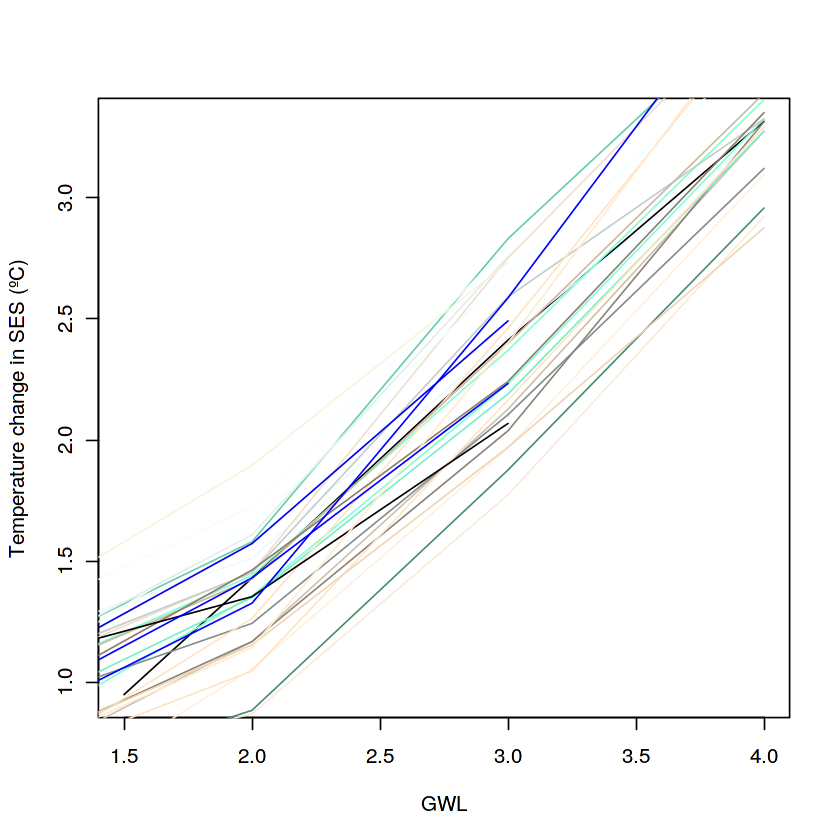

In [43]:
plot(c(1.5, 2, 3, 4), WL.cmip5$SES[1,], xlab = "GWL", ylab = "Temperature change in SES (ºC)", type = "l")
for (i in 2:nrow(WL.cmip5$SES)){
    lines(WL.cmip5$SES[i,], col = colors()[i])
}

Once the data is obtained, **the user is free to apply any additional operations**. For instance, in the next cell we will compute the ensemble mean for the SES region using function `apply`.

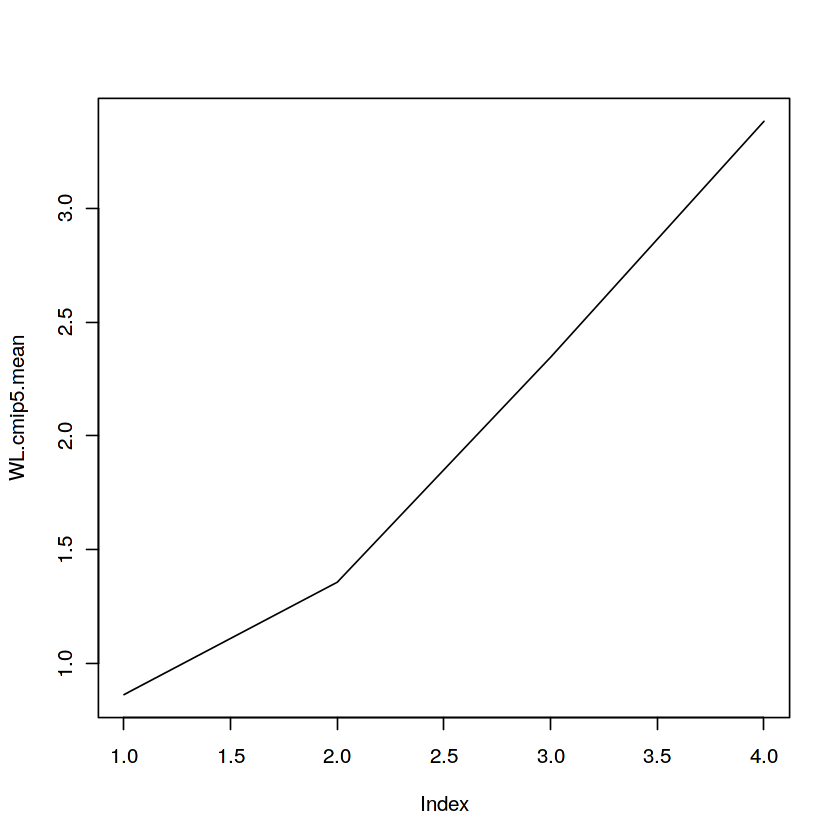

In [74]:
WL.cmip5.mean <- apply(WL.cmip5$SES, 2, mean, na.rm = T)
plot(WL.cmip5.mean, type = "l")

Use a `for` or a `lapply` loop to **apply the same operation for all available regions**:

In [75]:
WL.cmip5.mean <- lapply(WL.cmip5, function(x) apply(x, 2, mean, na.rm = T))

Convert from `list` to `data.frame` and add WL names:

In [82]:
data.frame("WL" = c(1.5, 2, 3, 4), WL.cmip5.mean)

WL,NSA,SES
<dbl>,<dbl>,<dbl>
1.5,1.079400,0.863154
2.0,1.670412,1.357391
3.0,2.950822,2.346420
4.0,4.304808,3.382959


In this case we will take advantage of the `lattice` plotting functionalities:

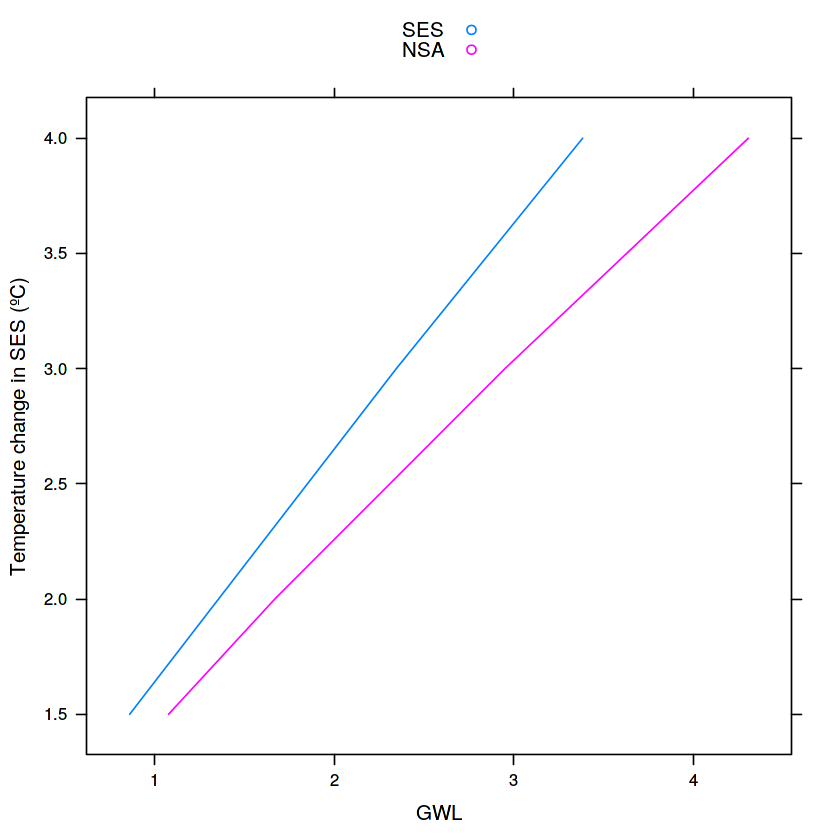

In [78]:
xyplot(WL~SES + NSA, data = cbind("WL" = c(1.5, 2, 3, 4),df), 
       xlab = "GWL", ylab = "Temperature change in SES (ºC)", 
       type = "l",
       auto.key = TRUE)

### 3. Session Information

In [81]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 14.04.6 LTS

Matrix products: default
BLAS:   /usr/lib/libblas/libblas.so.3.0
LAPACK: /usr/lib/lapack/liblapack.so.3.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_ES.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=es_ES.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=es_ES.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_ES.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] gridExtra_2.3       latticeExtra_0.6-29 lattice_0.20-41    
[4] httr_1.4.1          magrittr_1.5       

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.5         uuid_0.1-4         R6_2.4.1           jpeg_0.1-8.1      
 [5] rlang_0.4.5        tools_3.6.3        grid_3.6.3         gtable_0